In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [16]:
#combine json into a dataframe
with open('Q3a_json/Q3a_train_reward_1.json') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    data1.columns = [ 'reward1']
with open('Q3a_json/Q3a_train_reward_2.json') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)
    data2.columns = [ 'reward2']
with open('Q3a_json/Q3a_train_reward_3.json') as f:
    data3 = json.load(f)
    data3 = pd.DataFrame(data3)
    data3.columns = ['reward3']
data = pd.concat([data1, data2, data3],axis=1)
train_data = data.reset_index()
train_data.columns = ['episode', 'reward1', 'reward2', 'reward3']

with open('Q3a_json/Q3a_eval_reward_1.json') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    data1.columns = [ 'reward1']
with open('Q3a_json/Q3a_eval_reward_2.json') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)
    data2.columns = [ 'reward2']
with open('Q3a_json/Q3a_eval_reward_3.json') as f:
    data3 = json.load(f)
    data3 = pd.DataFrame(data3)
    data3.columns = ['reward3']
data = pd.concat([data1, data2, data3],axis=1)
test_data = data.apply(lambda x: x.mean()-6, axis=1)

test_data = test_data.reset_index()

test_data.columns = ['episode', 'reward']
test_data['episode'] = (test_data['episode'] + 1)*50

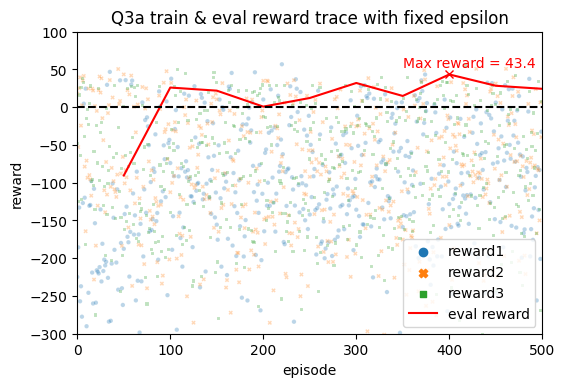

In [18]:
# plot the scatter plot of Q3a_train_reward.json

plt.figure(figsize=(6, 4),dpi = 100)
sns.scatterplot(data=train_data[['reward1','reward2','reward3']],  alpha=0.3, s = 10)
sns.lineplot(x='episode', y='reward', data=test_data, color='red', markers=True, dashes=False,label = 'eval reward')
# mark the maximum value of the lineplot
plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'rx')
# lable the maximum value with red color of the lineplot using red color
plt.text(test_data['episode'][test_data['reward'].idxmax()]-50, test_data['reward'].max()+10, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='red')


plt.xlabel('episode')
plt.ylabel('reward')
plt.xlim(0, 500)
plt.ylim(-300, 100)
plt.legend(loc='lower right')
# plot a base line for y = 0
plt.plot([0, 500], [0, 0], 'k--')

plt.title('Q3a train & eval reward trace with fixed epsilon')
plt.show()


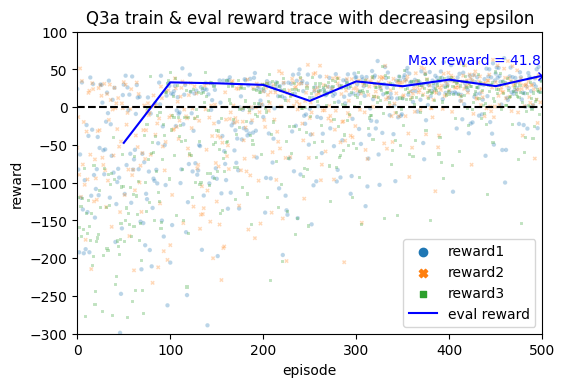

In [24]:
#combine json into a dataframe
with open('Q3b_json/Q3b_train_reward_1.json') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    data1.columns = [ 'reward1']
with open('Q3b_json/Q3b_train_reward_2.json') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)
    data2.columns = [ 'reward2']
with open('Q3b_json/Q3b_train_reward_3.json') as f:
    data3 = json.load(f)
    data3 = pd.DataFrame(data3)
    data3.columns = ['reward3']
data = pd.concat([data1, data2, data3],axis=1)
train_data = data.reset_index()
train_data.columns = ['episode', 'reward1', 'reward2', 'reward3']

with open('Q3b_json/Q3b_eval_reward_1.json') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    data1.columns = [ 'reward1']
with open('Q3b_json/Q3b_eval_reward_2.json') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)
    data2.columns = [ 'reward2']
with open('Q3b_json/Q3b_eval_reward_3.json') as f:
    data3 = json.load(f)
    data3 = pd.DataFrame(data3)
    data3.columns = ['reward3']
data = pd.concat([data1, data2, data3],axis=1)
test_data = data.apply(lambda x: x.mean(), axis=1)

test_data = test_data.reset_index()

test_data.columns = ['episode', 'reward']
test_data['episode'] = (test_data['episode'] + 1)*50


# plot the scatter plot of Q3a_train_reward.json

plt.figure(figsize=(6, 4),dpi = 100)
sns.scatterplot(data=train_data[['reward1','reward2','reward3']],  alpha=0.3, s = 10)
sns.lineplot(x='episode', y='reward', data=test_data, color='blue', markers=True, dashes=False,label = 'eval reward')
# mark the maximum value of the lineplot
plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'bx')
# lable the maximum value with red color of the lineplot using red color
plt.text(test_data['episode'][test_data['reward'].idxmax()]-144, test_data['reward'].max()+15, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='blue')


plt.xlabel('episode')
plt.ylabel('reward')
plt.xlim(0, 500)
plt.ylim(-300, 100)
plt.legend(loc='lower right')
# plot a base line for y = 0
plt.plot([0, 500], [0, 0], 'k--')

plt.title('Q3a train & eval reward trace with decreasing epsilon')
plt.show()